In [ ]:
#importing necessary library functions.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing dataset into notebook
file_path = '/content/AssignmentData _ ElectricPe.xlsx'
df = pd.read_excel(file_path)

#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StationID         22530 non-null  object        
 1   Station_Name      22530 non-null  object        
 2   Station_Type      22530 non-null  object        
 3   Station_Category  22530 non-null  object        
 4   Station_Access    22530 non-null  object        
 5   ChargerID         22530 non-null  object        
 6   Ping_Date         22530 non-null  datetime64[ns]
 7   hour0             22530 non-null  bool          
 8   hour1             22530 non-null  bool          
 9   hour2             22530 non-null  bool          
 10  hour3             22530 non-null  bool          
 11  hour4             22530 non-null  bool          
 12  hour5             22530 non-null  bool          
 13  hour6             22530 non-null  bool          
 14  hour7             2253

In [ ]:
df.shape

(22530, 31)

In [ ]:
df.isna().sum()

StationID              0
Station_Name           0
Station_Type           0
Station_Category       0
Station_Access         0
ChargerID              0
Ping_Date              0
hour0                  0
hour1                  0
hour2                  0
hour3                  0
hour4                  0
hour5                  0
hour6                  0
hour7                  0
hour8                  0
hour9                  0
hour10                 0
hour11                 0
hour12                 0
hour13                 0
hour14                 0
hour15                 0
hour16                 0
hour17              3755
hour18              3755
hour19              3755
hour20              3755
hour21              3755
hour22              3755
hour23              3755
dtype: int64

In [ ]:
#dropping all rows with NULL values.
df.dropna(inplace=True)

In [ ]:
#computing total no of hours of a particular charging station on particular date.
df['sum_of_hours'] = df.iloc[:, 7:31].sum(axis=1)

In [ ]:
df.describe()

,hour17,hour18,hour19,hour20,hour21,hour22,hour23,sum_of_hours
count,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000
mean,0.814221,0.816192,0.815659,0.816138,0.815712,0.814913,0.811771,19.332517
std,0.388939,0.387338,0.387772,0.387382,0.387729,0.388378,0.390905,8.968611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000


#Visualizations

Station Access vs Total Sum of Hours

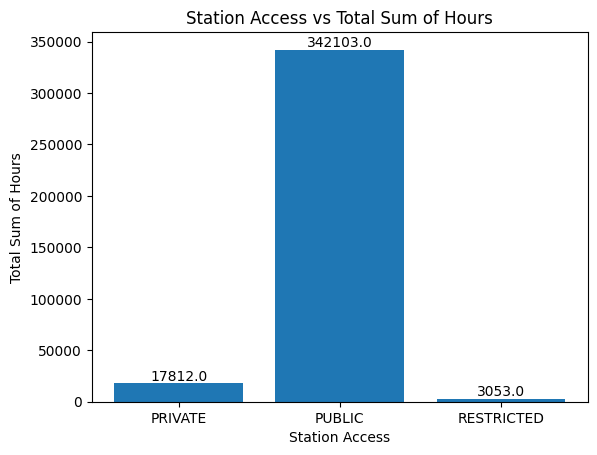

In [ ]:
# Group the dataset by Station Access and calculate the total sum_of_hours for each group
grouped = df.groupby('Station_Access')['sum_of_hours'].sum()

# Create a bar plot with Station Access as x axis and total sum_of_hours as Y axis
plt.bar(grouped.index, grouped.values)

# Add labels and title to the plot
plt.xlabel('Station Access')
plt.ylabel('Total Sum of Hours')
plt.title('Station Access vs Total Sum of Hours')

# Loop through the bars and add the value as text above them
for x, y in zip(grouped.index, grouped.values):
    plt.text(x, y, str(y), ha='center', va='bottom')


# Show the plot
plt.show()

Average Output by Station Access

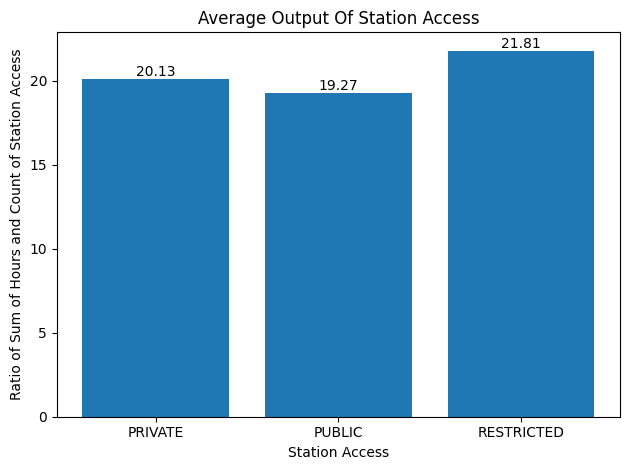

In [ ]:
grouped = df.groupby('Station_Access').agg({'sum_of_hours': 'sum', 'Station_Access': 'count'})

grouped['ratio'] = grouped['sum_of_hours'] / grouped['Station_Access']

plt.bar(grouped.index, grouped['ratio'])

# Add labels and title to the plot
plt.xlabel('Station Access')
plt.ylabel('Ratio of Sum of Hours and Count of Station Access')
plt.title('Average Output Of Station Access')

# Loop through the bars and add the value as text above them
for x, y in zip(grouped.index, grouped['ratio']):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

Station Category vs Total Sum of Hours

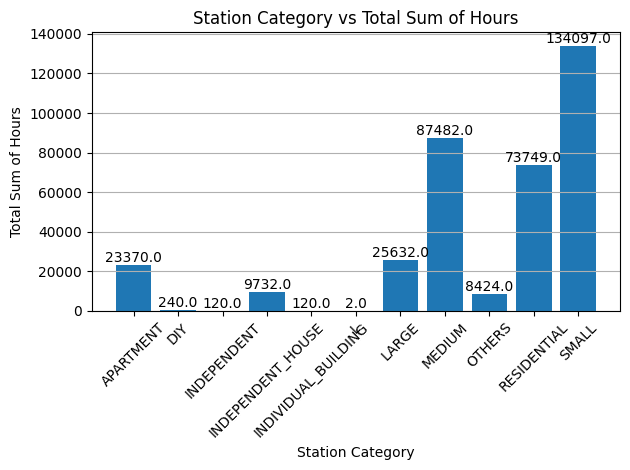

In [ ]:
# Group the dataset by Station Access and calculate the total sum_of_hours for each group
grouped = df.groupby('Station_Category')['sum_of_hours'].sum()

# Create a bar plot with Station Access as x axis and total sum_of_hours as Y axis
plt.bar(grouped.index, grouped.values)

plt.xticks(rotation=45)
plt.grid(axis='y')

# Add labels and title to the plot
plt.xlabel('Station Category')
plt.ylabel('Total Sum of Hours')
plt.title('Station Category vs Total Sum of Hours')

# Loop through the bars and add the value as text above them
for x, y in zip(grouped.index, grouped.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.tight_layout()
# Show the plot
plt.show()

Average Output by Station Category

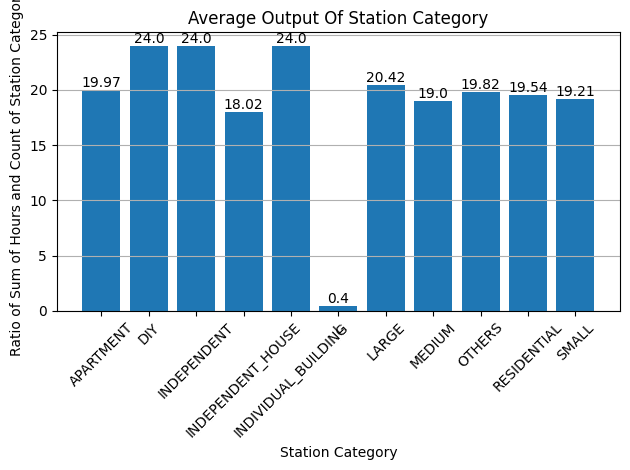

In [ ]:
grouped = df.groupby('Station_Category').agg({'sum_of_hours': 'sum', 'Station_Access': 'count'})

grouped['ratio'] = grouped['sum_of_hours'] / grouped['Station_Access']

plt.bar(grouped.index, grouped['ratio'])

plt.xticks(rotation=45)
plt.grid(axis='y')

# Add labels and title to the plot
plt.xlabel('Station Category')
plt.ylabel('Ratio of Sum of Hours and Count of Station Category')
plt.title('Average Output Of Station Category')

# Loop through the bars and add the value as text above them
for x, y in zip(grouped.index, grouped['ratio']):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()